In [261]:
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math


In [262]:
data=pd.read_csv(r"C:\Users\HP\Downloads\India Census 2011.csv")
data.fillna(0, inplace=True)
data.head()

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
0    439654   229064        190899           38165  ...        1700   5600   
1    335649   214866        162578           52288  ...        1489   5559   
2     93770    75079         53265           21814  ...         658   1092   
3     86236    51873         39839           12034  ...         604   1171   
4    261724   161393        117677           43716  ...         958  11188   

   Buddhists  Jains  Secondary_Education  Higher_Education  \
0         66     39                74948             39709   
1         47      6                66459             41367   
2      88635    103                16265              8923   
3      20126     28                16938              9826   
4         83     10                46062             29517   

   Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0               21751          600759           178435         89679  
1               27950          503223           160933         88978  
2                6197           70703            41515         21019  
3                3077           87532            35561         17488  
4               13962          304979           109818         61334  

[5 rows x 25 columns]

In [263]:
# shape
data.shape

(640, 25)

array([[<AxesSubplot:title={'center':'District_code'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Female'}>,
        <AxesSubplot:title={'center':'Literate'}>],
       [<AxesSubplot:title={'center':'Workers'}>,
        <AxesSubplot:title={'center':'Male_Workers'}>,
        <AxesSubplot:title={'center':'Female_Workers'}>,
        <AxesSubplot:title={'center':'Cultivator_Workers'}>,
        <AxesSubplot:title={'center':'Agricultural_Workers'}>],
       [<AxesSubplot:title={'center':'Household_with_phone'}>,
        <AxesSubplot:title={'center':'Hindus'}>,
        <AxesSubplot:title={'center':'Muslims'}>,
        <AxesSubplot:title={'center':'Christians'}>,
        <AxesSubplot:title={'center':'Sikhs'}>],
       [<AxesSubplot:title={'center':'Buddhists'}>,
        <AxesSubplot:title={'center':'Jains'}>,
        <AxesSubplot:title={'center':'Secondary_Education'}>,
        <AxesSubplot:title={'c

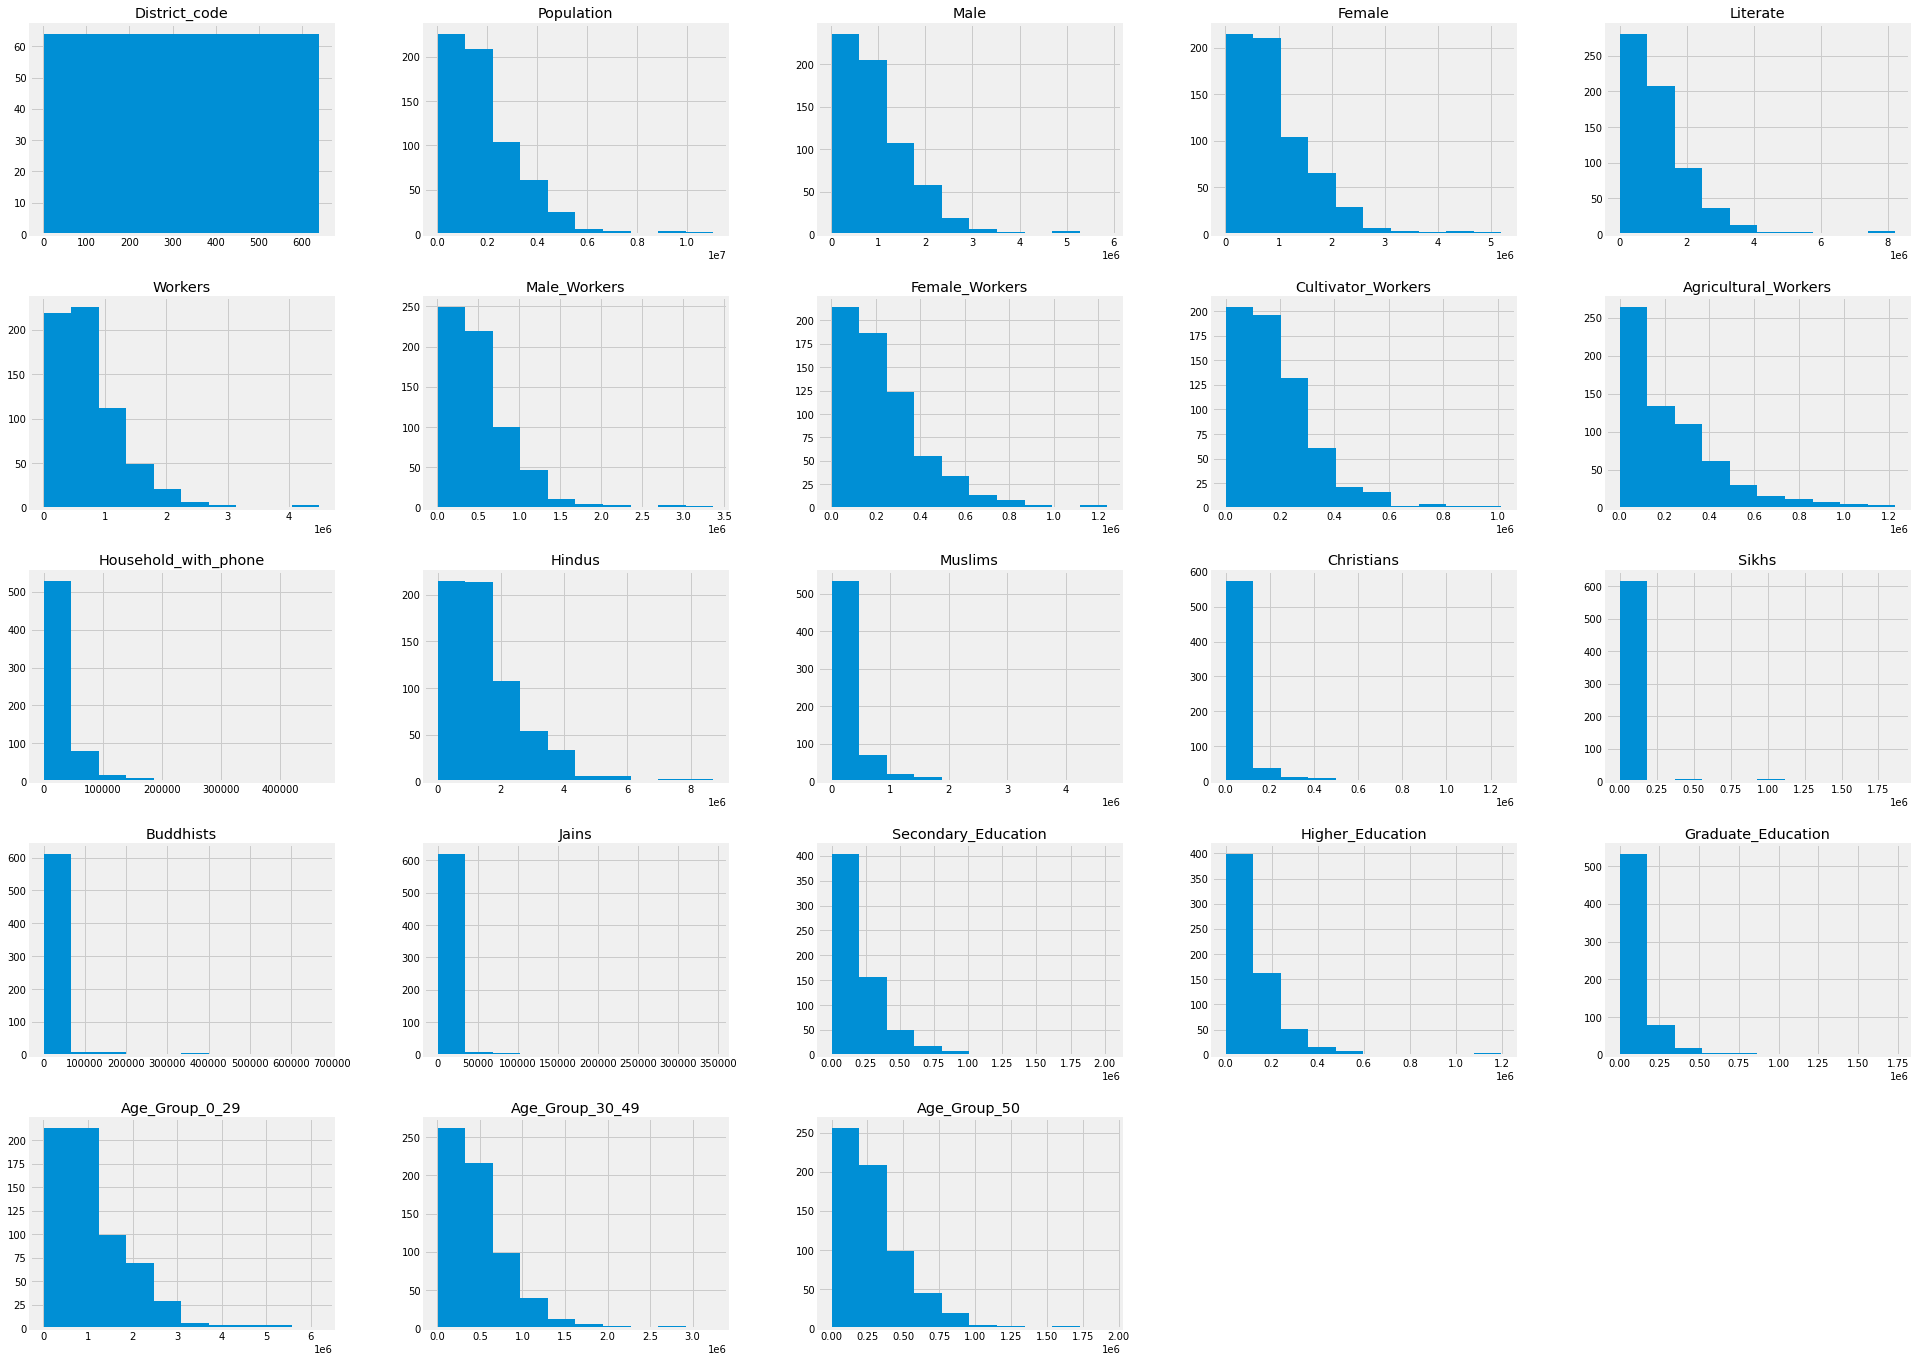

In [264]:
plt.rcParams["figure.figsize"] = 30,24
data.hist()

In [265]:
data.style.hide_index()

In [266]:
print(data.groupby('State_name').size())

State_name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK

In [267]:
'''
Calculating state wise LIT_Education rates
'''
# Group the data state-wise
states_group = data.groupby(by = "State_name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

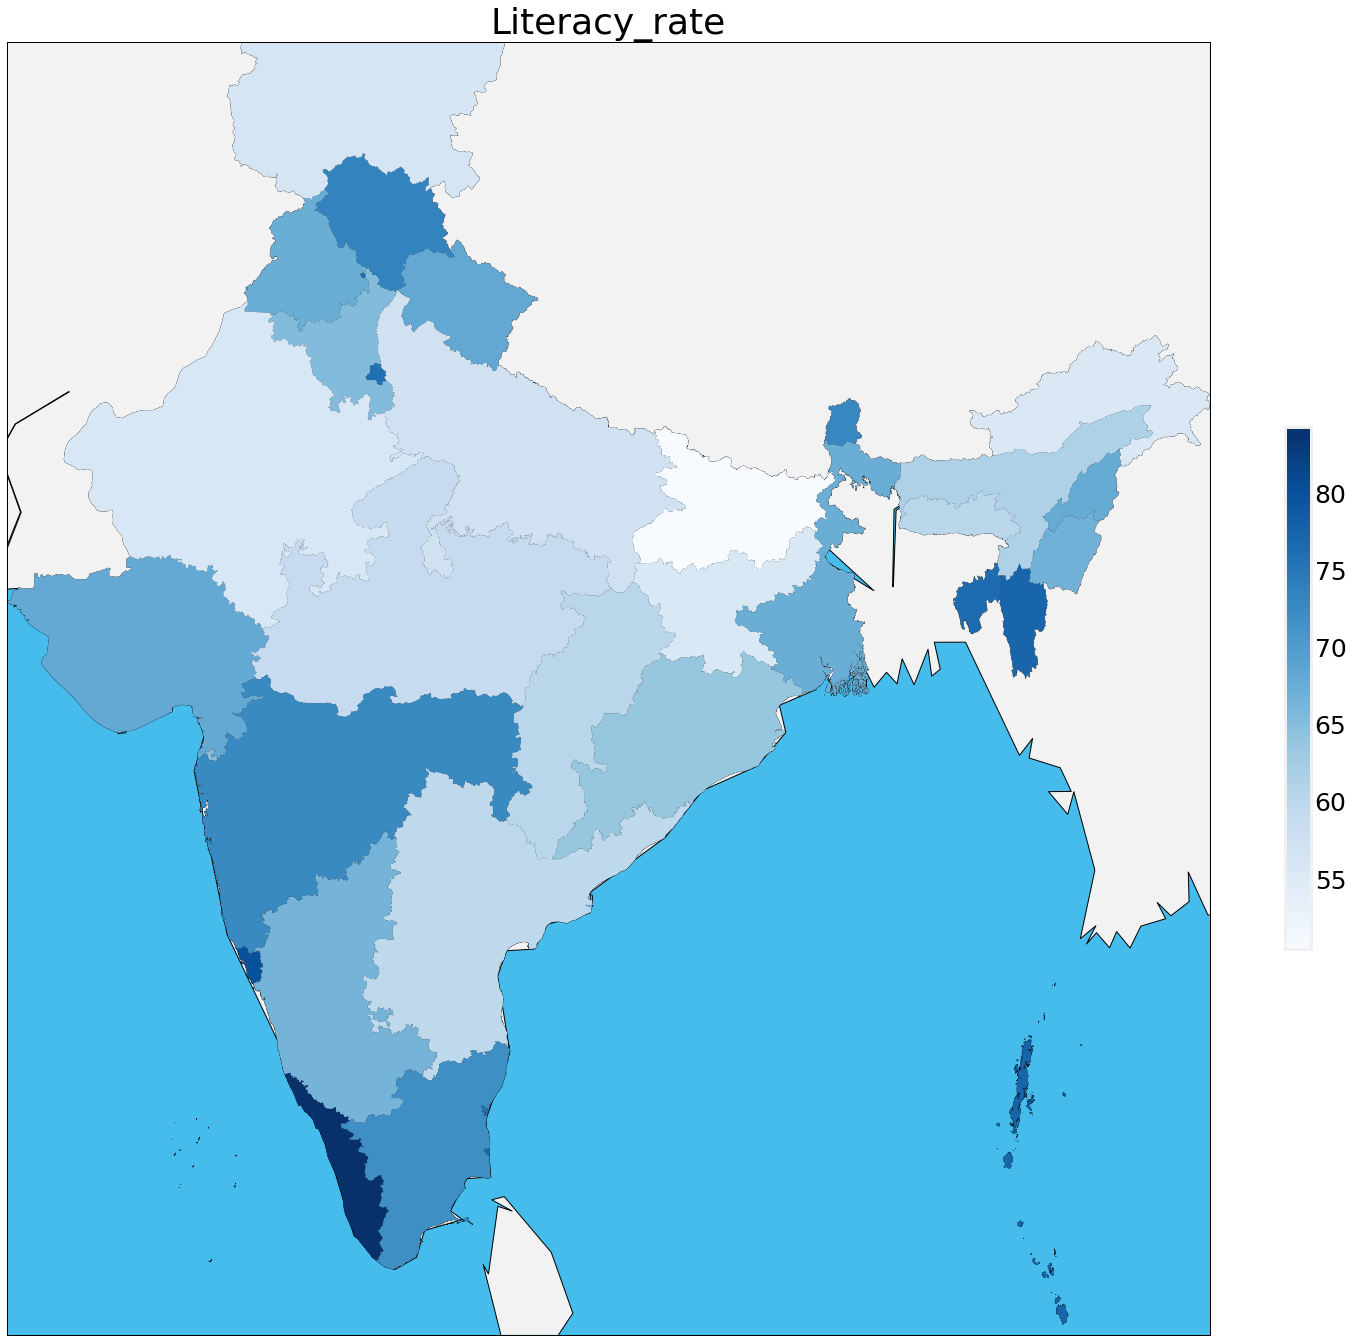

In [294]:
#PLOTTING A GEOGRAPHIC MAP FOR STATEWISE Literacy_rate
'''Creating a Map'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()
'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile(r"C:\Users\HP\Downloads\India_SHP\INDIA","INDIA")

'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND LITERACY RATES
'''
# Create an empty list to hold graduate rates
lit_rate = []
# Iterate through all rows of INDIA_info file
# Each row is a dictionary. Here, we try to map state name with literacy rate
for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['ST_NAME'].upper()
    # initialize rate = 0
    rate = 0
    
    # In literacy_rate (containing tuples of state name and graduate_education rates), search for state 'state'
    # Append its corresponding graduate_education rate to gra_rate
    for x in literacy_rate:
        if x[0] == state:
            rate = x[1]
            break
    lit_rate.append(rate) 
    

    

# Create a dataframe containing shapes, state names and graduate_education rates    
df_poly = pd.DataFrame({
    'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
    'area': [area['ST_NAME'] for area in m.INDIA_info],
    'lit_rate' : lit_rate
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Blues')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(lit_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("Literacy_rate")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 20})
plt.show()

In [269]:

df_MAHARASHTRA= data.loc[data['State_name'] == 'MAHARASHTRA']


print("rows = %s"%(str(len(df_MAHARASHTRA))))
df_MAHARASHTRA.head()


rows = 35


District_code   State_name District_name  Population     Male   Female  \
496            497  MAHARASHTRA     Nandurbar     1648295   833170   815125   
497            498  MAHARASHTRA         Dhule     2050862  1054031   996831   
498            499  MAHARASHTRA       Jalgaon     4229917  2197365  2032552   
499            500  MAHARASHTRA       Buldana     2586258  1337560  1248698   
500            501  MAHARASHTRA         Akola     1813906   932334   881572   

     Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
496    906509   792065        442898          349167  ...        8467    685   
497   1293916   936370        570448          365922  ...        3653   1422   
498   2891882  1863571       1186472          677099  ...        7091   3091   
499   1879874  1219641        734024          485617  ...        3531   1668   
500   1411281   768154        520362          247792  ...        4483   1504   

     Buddhists  Jains  Secondary_Education  Higher_Education  \
496       4969   6191               160961            113019   
497      13405  12818               290656            182739   
498     143865  27404               627198            375643   
499     364229  12242               406379            228266   
500     328033  10205               291391            205723   

     Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
496               58461         1011352           390419        241534  
497              114931         1167569           513908        350747  
498              229987         2352671          1080237        763529  
499              113783         1467457           641840        473071  
500              112574          998769           483200        327932  

[5 rows x 25 columns]

In [270]:
df_GUJARAT = data.loc[data['State_name'] == 'GUJARAT']
df_GUJARAT.head()

District_code State_name District_name  Population     Male   Female  \
467            468    GUJARAT       Kachchh     2092371  1096737   995634   
468            469    GUJARAT  Banas Kantha     3120506  1610379  1510127   
469            470    GUJARAT         Patan     1343734   694397   649337   
470            471    GUJARAT      Mahesana     2035064  1056520   978544   
471            472    GUJARAT  Sabar Kantha     2428589  1244231  1184358   

     Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
467   1252319   776228        624704          151524  ...        6192   6353   
468   1704923  1248600        836268          412332  ...        1686    486   
469    837913   554830        383074          171756  ...         916    337   
470   1502645   812064        588699          223365  ...        1954   1082   
471   1578734  1084878        681435          403443  ...        6375    614   

     Buddhists  Jains  Secondary_Education  Higher_Education  \
467        490  25312               157284             61366   
468        281  12659               226765            105372   
469         66   3602               129584             57494   
470        146   7087               266108            139208   
471        168  11110               333650            198963   

     Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
467               60386         1278604           524052        286086  
468               66950         1984701           738412        394793  
469               46355          786357           341381        213465  
470              130723         1119451           554432        357578  
471              110817         1393131           630963        400905  

[5 rows x 25 columns]

In [295]:
df_Bihar = data.loc[data['State_name'] == 'BIHAR']
df_Bihar.head()

District_code State_name       District_name  Population     Male  \
202            203      BIHAR  Pashchim Champaran     3935042  2061110   
203            204      BIHAR     Purba Champaran     5099371  2681209   
204            205      BIHAR             Sheohar      656246   346673   
205            206      BIHAR           Sitamarhi     3423574  1803252   
206            207      BIHAR           Madhubani     4487379  2329313   

      Female  Literate  Workers  Male_Workers  Female_Workers  ...  \
202  1873932   1759481  1478947        999282          479665  ...   
203  2418162   2276957  1737539       1260774          476765  ...   
204   309573    283698   216372        166693           49679  ...   
205  1620322   1436794  1114583        865929          248654  ...   
206  2158066   2155338  1636938       1105947          530991  ...   

     Christians  Sikhs  Buddhists  Jains  Secondary_Education  \
202        8469    926       1337    296               159563   
203        4865    668        878    464               241118   
204         522    216         73     52                25657   
205        2897    261        253    188               136500   
206        3262    564        328    442               303114   

     Higher_Education  Graduate_Education  Age_Group_0_29  Age_Group_30_49  \
202             98732               70669         2544205           888205   
203            121594               68781         3316422          1122340   
204             16031               10091          421241           139909   
205             92783               70549         2206340           739982   
206            170563              137780         2860455          1009424   

     Age_Group_50  
202        497793  
203        648009  
204         93398  
205        449035  
206        611899  

[5 rows x 25 columns]

In [298]:
df_TamilNadu=data.loc[data['State_name'] == 'TAMIL NADU']
df_TamilNadu.head()

District_code  State_name   District_name  Population     Male   Female  \
601            602  TAMIL NADU     Thiruvallur     3728104  1876062  1852042   
602            603  TAMIL NADU         Chennai     4646732  2335844  2310888   
603            604  TAMIL NADU    Kancheepuram     3998252  2012958  1985294   
604            605  TAMIL NADU         Vellore     3936331  1961688  1974643   
605            606  TAMIL NADU  Tiruvannamalai     2464875  1235889  1228986   

     Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
601   2791721  1538054       1103563          434491  ...      233633   1422   
602   3776276  1817297       1369302          447995  ...      358662   2851   
603   3013382  1673814       1181308          492506  ...      256762   1620   
604   2773928  1689330       1123874          565456  ...      111390    676   
605   1626813  1238177        738995          499182  ...       66987    232   

     Buddhists  Jains  Secondary_Education  Higher_Education  \
601        951   3693               622789            303091   
602       2804  51708               801050            464207   
603        990   4962               634172            312208   
604        438   3514               641585            311434   
605        157   7898               343955            174560   

     Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
601              451321         1925296          1154775        643614  
602              905515         2271657          1468902        899279  
603              526886         2076492          1200284        715895  
604              308514         2096113          1116437        720713  
605              158041         1301347           683904        477668  

[5 rows x 25 columns]

In [300]:
def similar_districts(df1, df2):
    # Set indices for both the data frames
    df1.set_index('District_code')
    df2.set_index('District_code')
    
    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []
    
    # Iterate through rows of df1
    for row1 in df1.iterrows(): 
        # Create list to hold similarity score of row1 with other rows of df2
        diff=[]
        # Iterate through rows of df2
        for row2 in df2.iterrows():
            # Calculate sum of squared differences
            dist = 0
            for column in list(data)[3:]:
                max_col = max(data[column])
                min_col = min(data[column]) 
    
                dist += pow((row1[1][column] - row2[1][column])/(max_col - min_col),2)
            # Take sqrt and inverse the result
            diff.append(1/math.sqrt(dist))
        # Append similarity scores
        main_diff.append(diff)

    # Find the max value of similarity score from lists of lists
    max_val = 0
    max_index1 = 0
    max_index2 = 0
    for i in range(len(main_diff)):

        for j in range(len(main_diff[i])):
            if(main_diff[i][j] > max_val):
                max_val = main_diff[i][j]
                max_index1 = i
                max_index2 = j

    print ("%s from GUJARAT and %s from  MAHARASHTRA are most similar" %(df1['District_name'].iloc[max_index1],
                                                                    df2['District_name'].iloc[max_index2]))
    return main_diff
    
sim_matrix = similar_districts(df_GUJARAT, df_MAHARASHTRA)

Kheda from GUJARAT and Dhule from  MAHARASHTRA are most similar


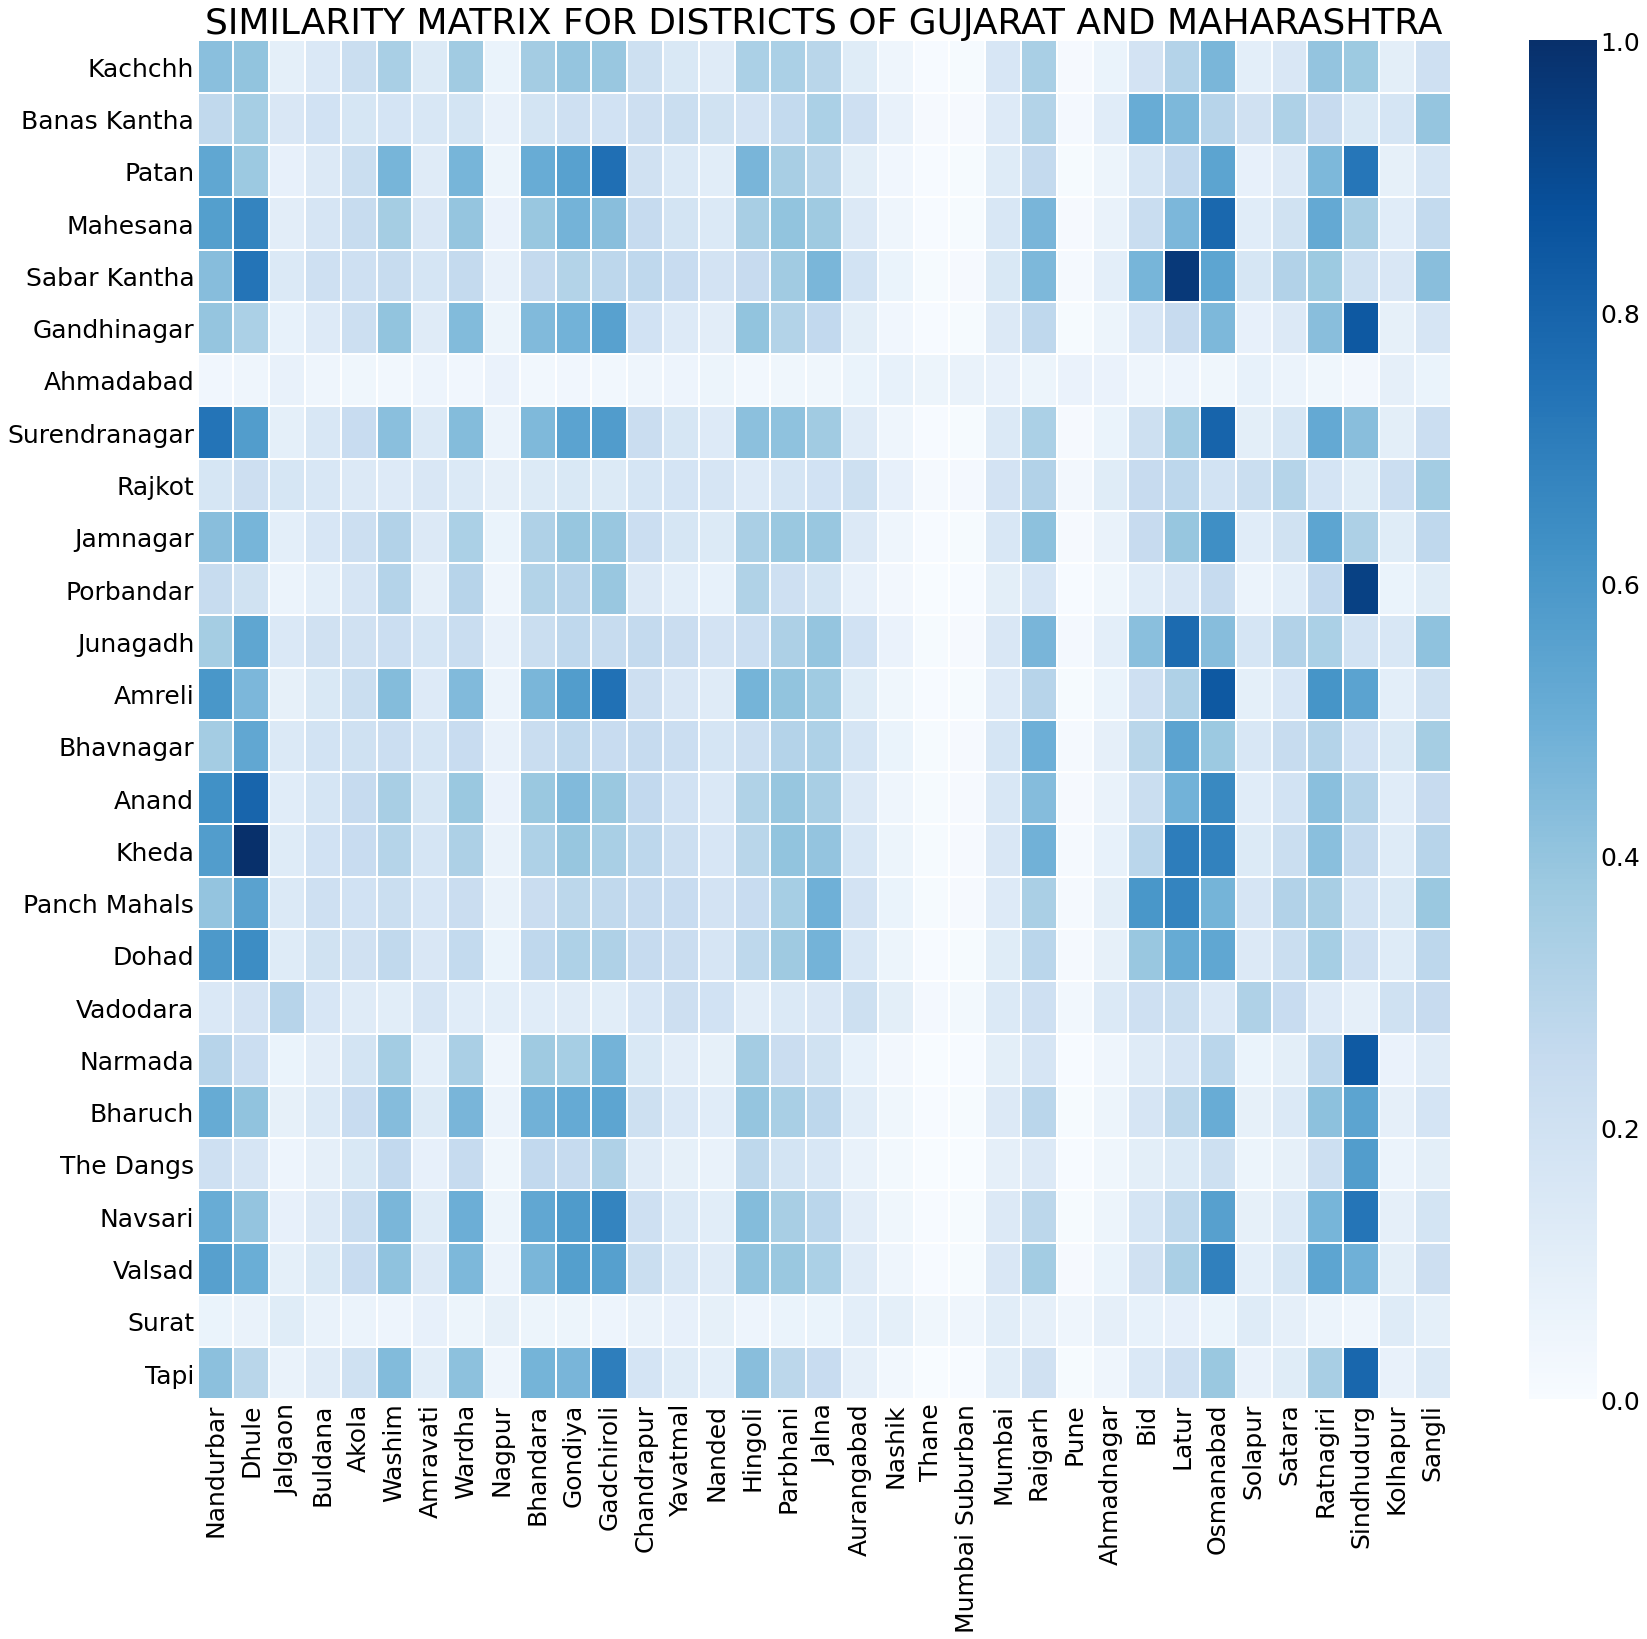

In [293]:
norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix), xticklabels=df_MAHARASHTRA['District_name'],yticklabels=df_GUJARAT['District_name'],
            linewidths=0.05,cmap='Blues').set_title("SIMILARITY MATRIX FOR DISTRICTS OF GUJARAT AND MAHARASHTRA")
plt.rcParams['figure.figsize'] = (24,24)

In [273]:
# Create a group w.r.t. State name
states_group = data.groupby(by = "State_name")

# Lists for Female population and Female_Workers values for each state
Female = []
Female_Workers = []

# Iterate through the groups
for key , group in states_group:
    total_female = 0
    total_female_workers = 0
    
    # Iterate through each group and calculate total agri workers and total households with mobiles
    for row in group.iterrows():
    
        #total_mobi_pop += row[1][58] # 58 = Index of column 'Households_with_Telephone_Mobile_Phone_Landline_only'
        total_female += row[1][5] # 59 = Index of column 'Households_with_Telephone_Mobile_Phone_Mobile_only'
        total_female_workers += row[1][9] # 22 = Index of 'Agricultural Workers'
    
    # Append both values to respective lists
    Female.append((key,total_female))
    Female_Workers.append((key,total_female_workers))
    
# Create a dataframe holding state name, households_with_mobile and agri_workers 
df_mobile_penetration =  pd.DataFrame({
        'state' : [x[0] for x in states_group] ,
        'Female': [x[1] for x in Female],
        'Female_Workers' : [x[1] for x in Female_Workers]
        
    })

# View the dataframe
df_mobile_penetration

state    Female  Female_Workers
0   ANDAMAN AND NICOBAR ISLANDS    177710           31646
1                ANDHRA PRADESH  42138631        15237311
2             ARUNACHAL PRADESH    669815          237384
3                         ASSAM  15266133         3428130
4                         BIHAR  49821295         9502798
5                    CHANDIGARH    474787           75977
6                  CHHATTISGARH  12712303         5046359
7        DADRA AND NAGAR HAVELI    149949           37868
8                 DAMAN AND DIU     92946           13837
9                           GOA    719405          157712
10                      GUJARAT  28948432         6766833
11                      HARYANA  11856728         2109872
12             HIMACHAL PRADESH   3382729         1516049
13            JAMMU AND KASHMIR   5900640         1127623
14                    JHARKHAND  16057819         4673505
15                    KARNATAKA  30128640         9602481
16                       KERALA  17378649         3167494
17                  LAKSHADWEEP     31350            3435
18               MADHYA PRADESH  35014503        11427163
19                  MAHARASHTRA  54131277        16811003
20                      MANIPUR   1417208          565202
21                    MEGHALAYA   1475057          481910
22                      MIZORAM    541867          195965
23                     NAGALAND    953853          426765
24                 NCT OF DELHI   7800615          825023
25                       ORISSA  20762082         5638934
26                  PONDICHERRY    635442          112037
27                       PUNJAB  13103873         1823205
28                    RAJASTHAN  32997440        11589179
29                       SIKKIM    287507          113780
30                   TAMIL NADU  36009055        11449703
31                      TRIPURA   1799541          424195
32                UTTAR PRADESH  95331831        15967953
33                  UTTARAKHAND   4948519         1320354
34                  WEST BENGAL  44467088         8040308

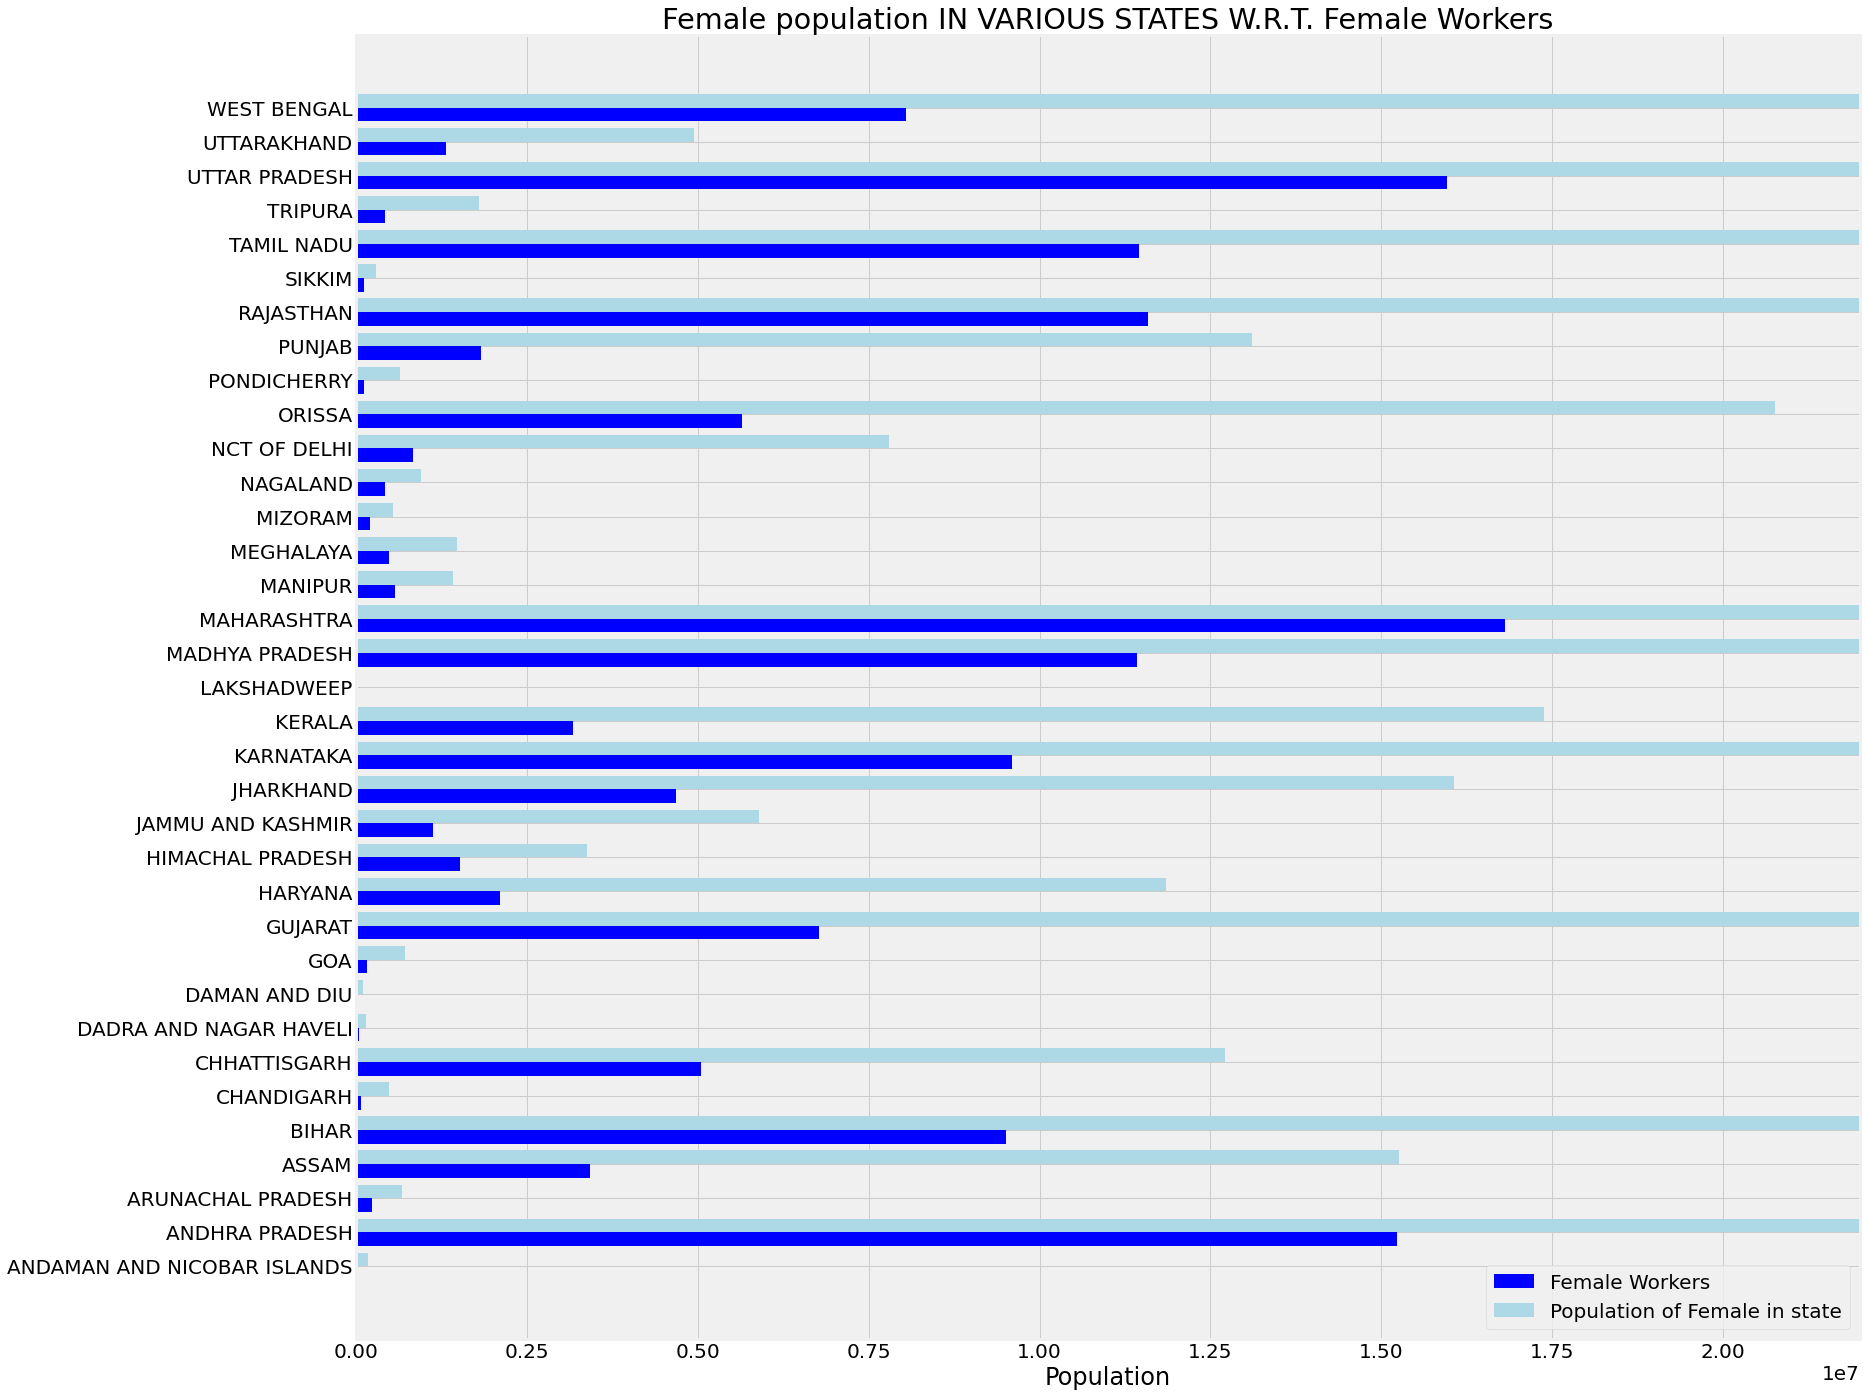

In [274]:
#PLOTTING STATEWISE DISTRIBUTION OF Female_Workers AND Female
from numpy import *
ind = arange(35)
width = 0.4

fig, ax = plt.subplots()
plt.xlim(0,22000000)
rects1 = ax.barh(ind, df_mobile_penetration['Female_Workers'],width,color='b',align='center')
rects2 = ax.barh(ind+width, df_mobile_penetration['Female'],width,color='lightblue',align='center')
ax.set_xlabel('Population')
ax.set_title('Female population IN VARIOUS STATES W.R.T. Female Workers')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels((x for x in df_mobile_penetration['state']))
ax.legend((rects1[0], rects2[0]), ('Female Workers', 'Population of Female in state'))
plt.rcParams.update({'font.size': 25})
plt.rcParams['figure.figsize'] = (25,25)
plt.show()


<ipython-input-292-ae59505532ce>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop = pd.DataFrame(data.groupby(['District_name'])['Population', 'Agricultural_Workers', 'Household_with_phone'].sum()).sort_values(by=['Population'], ascending=False)


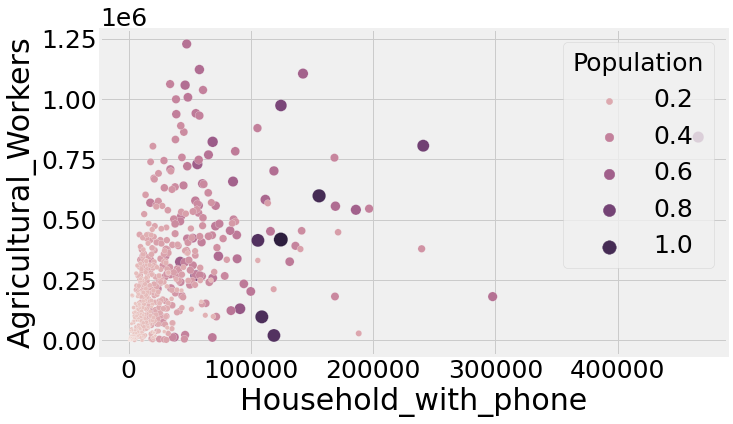

In [292]:
#DISTRIBUTION OF HOUSEHOLDS USING MOBILES AND AGRICULTURAL WORKERS
plt.figure(figsize=(10,6))
pop = pd.DataFrame(data.groupby(['District_name'])['Population', 'Agricultural_Workers', 'Household_with_phone'].sum()).sort_values(by=['Population'], ascending=False)
sns.scatterplot(data=pop, x='Household_with_phone', y='Agricultural_Workers', hue='Population',size='Population', legend='brief', sizes=(2, 200))
plt.show()

In [276]:
data.describe()

District_code    Population          Male        Female      Literate  \
count     640.000000  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean      320.500000  1.891961e+06  9.738598e+05  9.181011e+05  1.193186e+06   
std       184.896367  1.544380e+06  8.007785e+05  7.449864e+05  1.068583e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   
25%       160.750000  8.178610e+05  4.171682e+05  4.017458e+05  4.825982e+05   
50%       320.500000  1.557367e+06  7.986815e+05  7.589200e+05  9.573465e+05   
75%       480.250000  2.583551e+06  1.338604e+06  1.264277e+06  1.602260e+06   
max       640.000000  1.106015e+07  5.865078e+06  5.195070e+06  8.227161e+06   

            Workers  Male_Workers  Female_Workers  Cultivator_Workers  \
count  6.400000e+02  6.400000e+02    6.400000e+02        6.400000e+02   
mean   7.529514e+05  5.186561e+05    2.342953e+05        1.856387e+05   
std    6.071622e+05  4.412388e+05    1.913541e+05        1.514895e+05   
min    3.555000e+03  2.228000e+03    1.327000e+03        0.000000e+00   
25%    3.284688e+05  2.294168e+05    9.420350e+04        7.491025e+04   
50%    6.223410e+05  4.288515e+05    1.929265e+05        1.501250e+05   
75%    1.036544e+06  6.991510e+05    3.163658e+05        2.553015e+05   
max    4.492767e+06  3.363123e+06    1.239177e+06        1.013050e+06   

       Agricultural_Workers  ...    Christians         Sikhs      Buddhists  \
count          6.400000e+02  ...  6.400000e+02  6.400000e+02     640.000000   
mean           2.255513e+05  ...  4.346811e+04  3.255174e+04   13192.143750   
std            2.216222e+05  ...  1.087273e+05  1.603859e+05   56347.946567   
min            0.000000e+00  ...  1.710000e+02  3.000000e+00       1.000000   
25%            5.284175e+04  ...  1.951750e+03  2.537500e+02     163.750000   
50%            1.645300e+05  ...  6.079500e+03  7.375000e+02     372.000000   
75%            3.258982e+05  ...  2.750850e+04  2.800000e+03    1942.500000   
max            1.227956e+06  ...  1.248137e+06  1.863408e+06  668050.000000   

               Jains  Secondary_Education  Higher_Education  \
count     640.000000         6.400000e+02      6.400000e+02   
mean     6955.864062         2.051046e+05      1.241736e+05   
std     23624.010655         2.164778e+05      1.304154e+05   
min         0.000000         8.090000e+02      6.560000e+02   
25%       124.750000         7.078575e+04      4.234700e+04   
50%       741.000000         1.523325e+05      8.998700e+04   
75%      4150.750000         2.629160e+05      1.583555e+05   
max    343639.000000         2.018079e+06      1.196965e+06   

       Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
count        6.400000e+02    6.400000e+02     6.400000e+02  6.400000e+02  
mean         1.090132e+05    1.102826e+06     4.820189e+05  3.001005e+05  
std          1.502260e+05    8.887434e+05     4.183230e+05  2.549556e+05  
min          3.560000e+02    5.113000e+03     2.088000e+03  7.860000e+02  
25%          2.799200e+04    4.786540e+05     2.101965e+05  1.193285e+05  
50%          6.624350e+04    8.896820e+05     3.905085e+05  2.421020e+05  
75%          1.299488e+05    1.491204e+06     6.525142e+05  4.045875e+05  
max          1.733274e+06    6.184519e+06     3.241888e+06  1.921143e+06  

[8 rows x 23 columns]

In [277]:
# difference between male and female workers for each state
(data.Male_Workers - data.Female_Workers).describe()

count    6.400000e+02
mean     2.843608e+05
std      3.065455e+05
min     -1.329100e+04
25%      9.055525e+04
50%      2.047975e+05
75%      3.718278e+05
max      2.318754e+06
dtype: float64

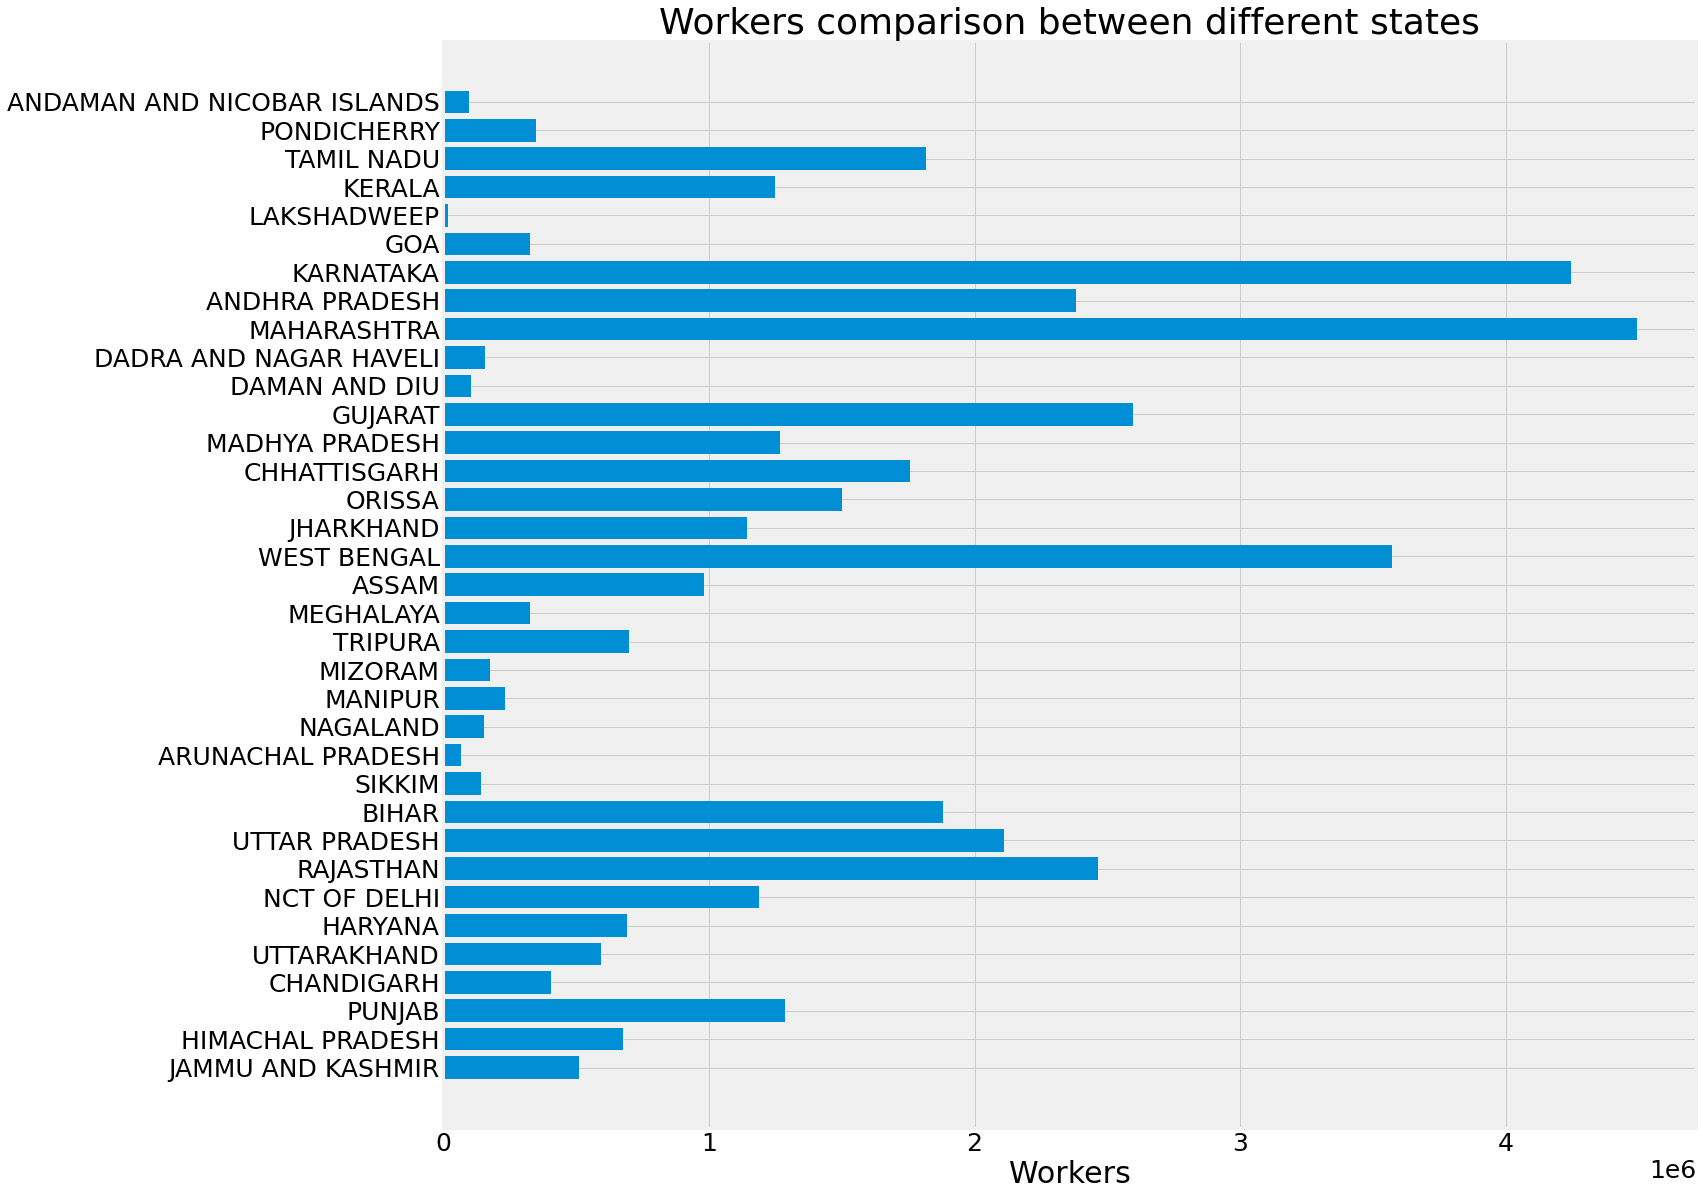

In [278]:
#bar chart of Workers comparison between different states
plot_barh(data, 'State_name', 'Workers', title = 'Workers comparison \
between different states' , xlabel = 'Workers')

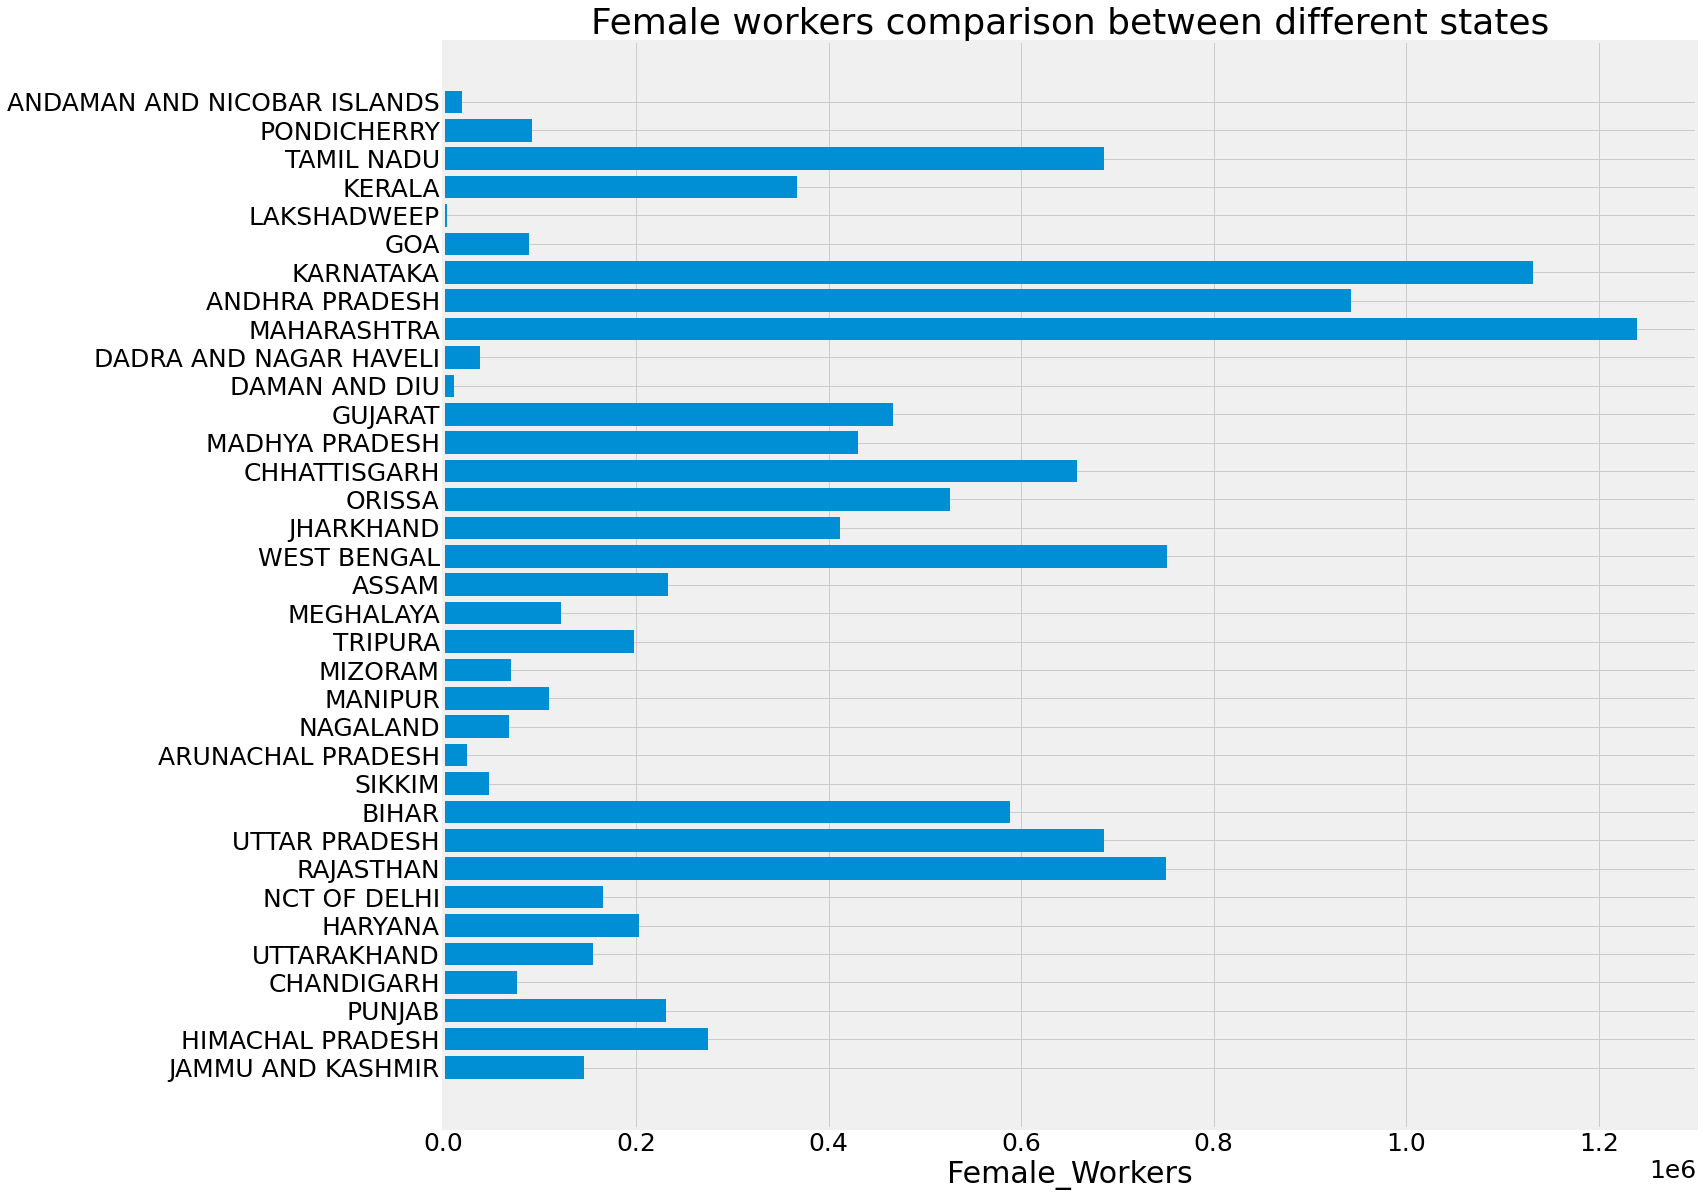

In [279]:
#bar chart of female_Workers comparison between different states
plot_barh(data, 'State_name', 'Female_Workers', title = 'Female workers comparison \
between different states' , xlabel = 'Female_Workers')

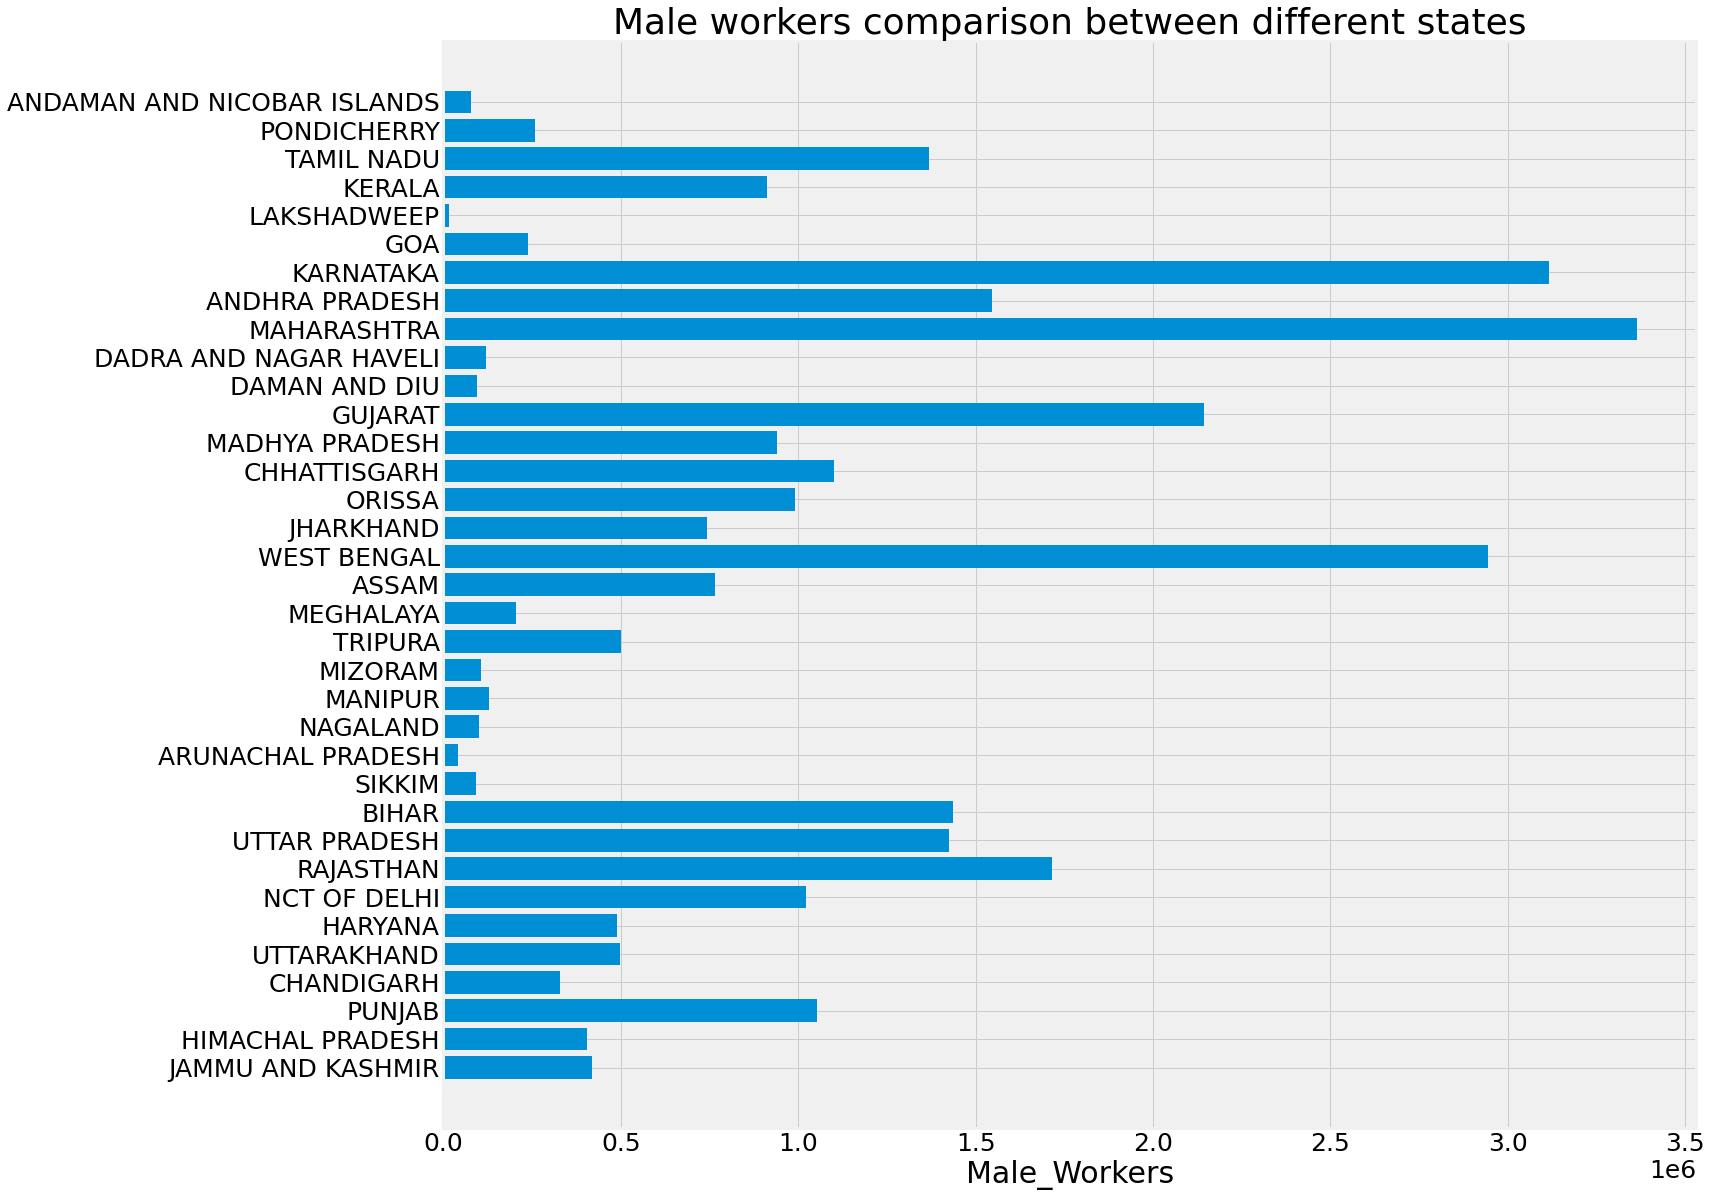

In [280]:
#bar chart of Male_Workers comparison between different states
plot_barh(data, 'State_name', 'Male_Workers', title = 'Male workers comparison \
between different states' , xlabel = 'Male_Workers')

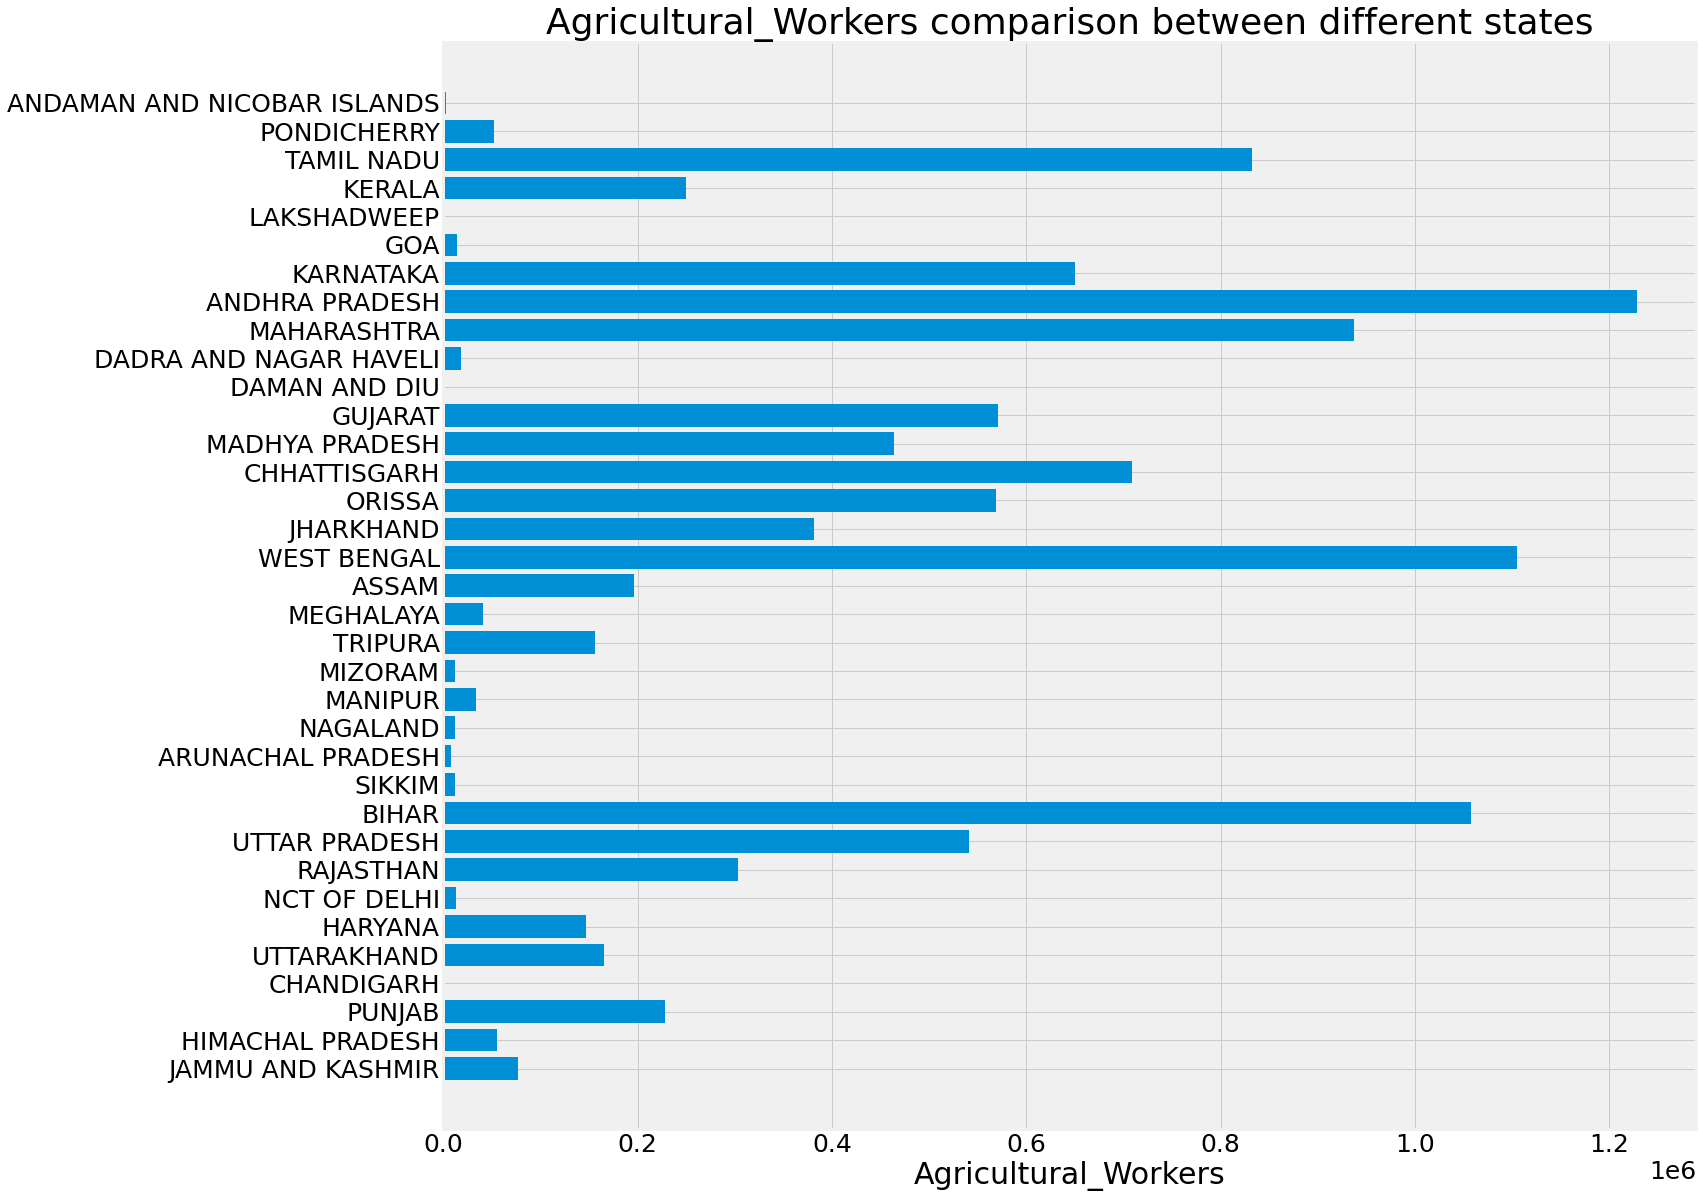

In [281]:
#bar chart of Agricultural_Workers comparison between different states
plot_barh(data, 'State_name', 'Agricultural_Workers', title = 'Agricultural_Workers comparison \
between different states' , xlabel = 'Agricultural_Workers')

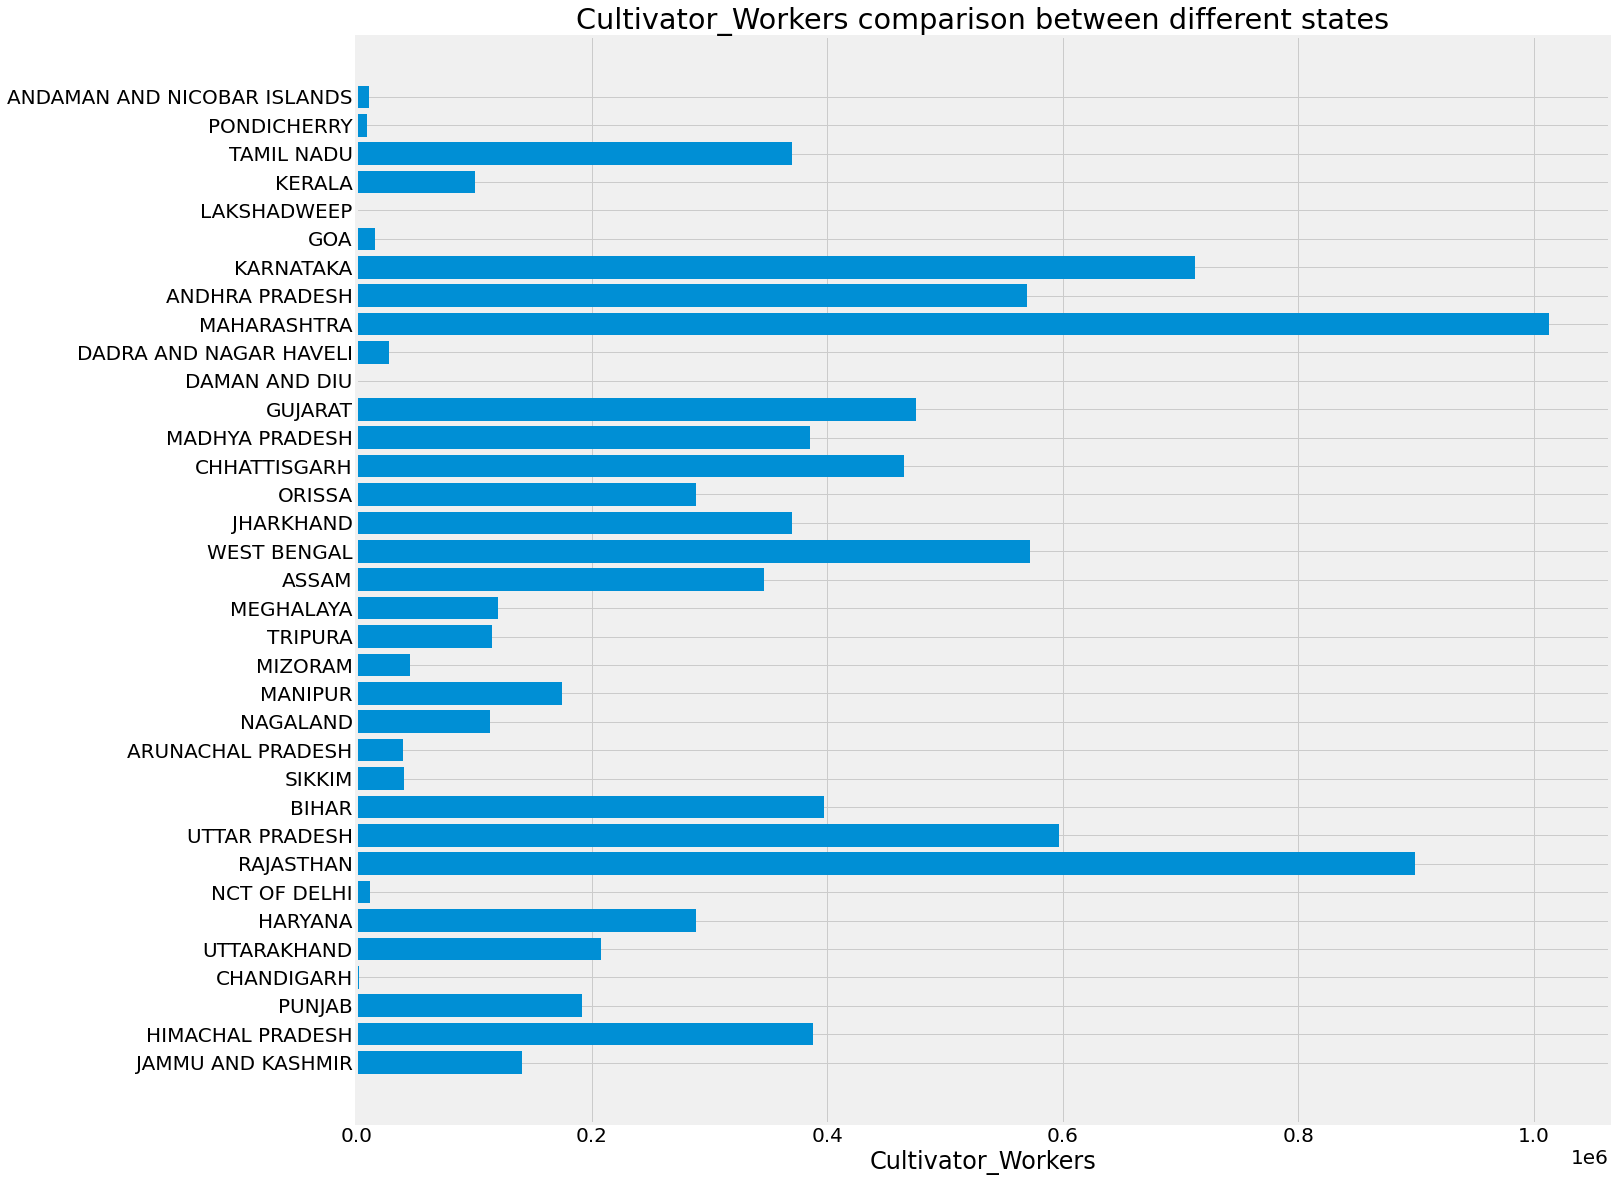

In [301]:
#bar chart of Cultivator_Workers comparison between different states
plot_barh(data, 'State_name', 'Cultivator_Workers', title = 'Cultivator_Workers comparison \
between different states' , xlabel = 'Cultivator_Workers')

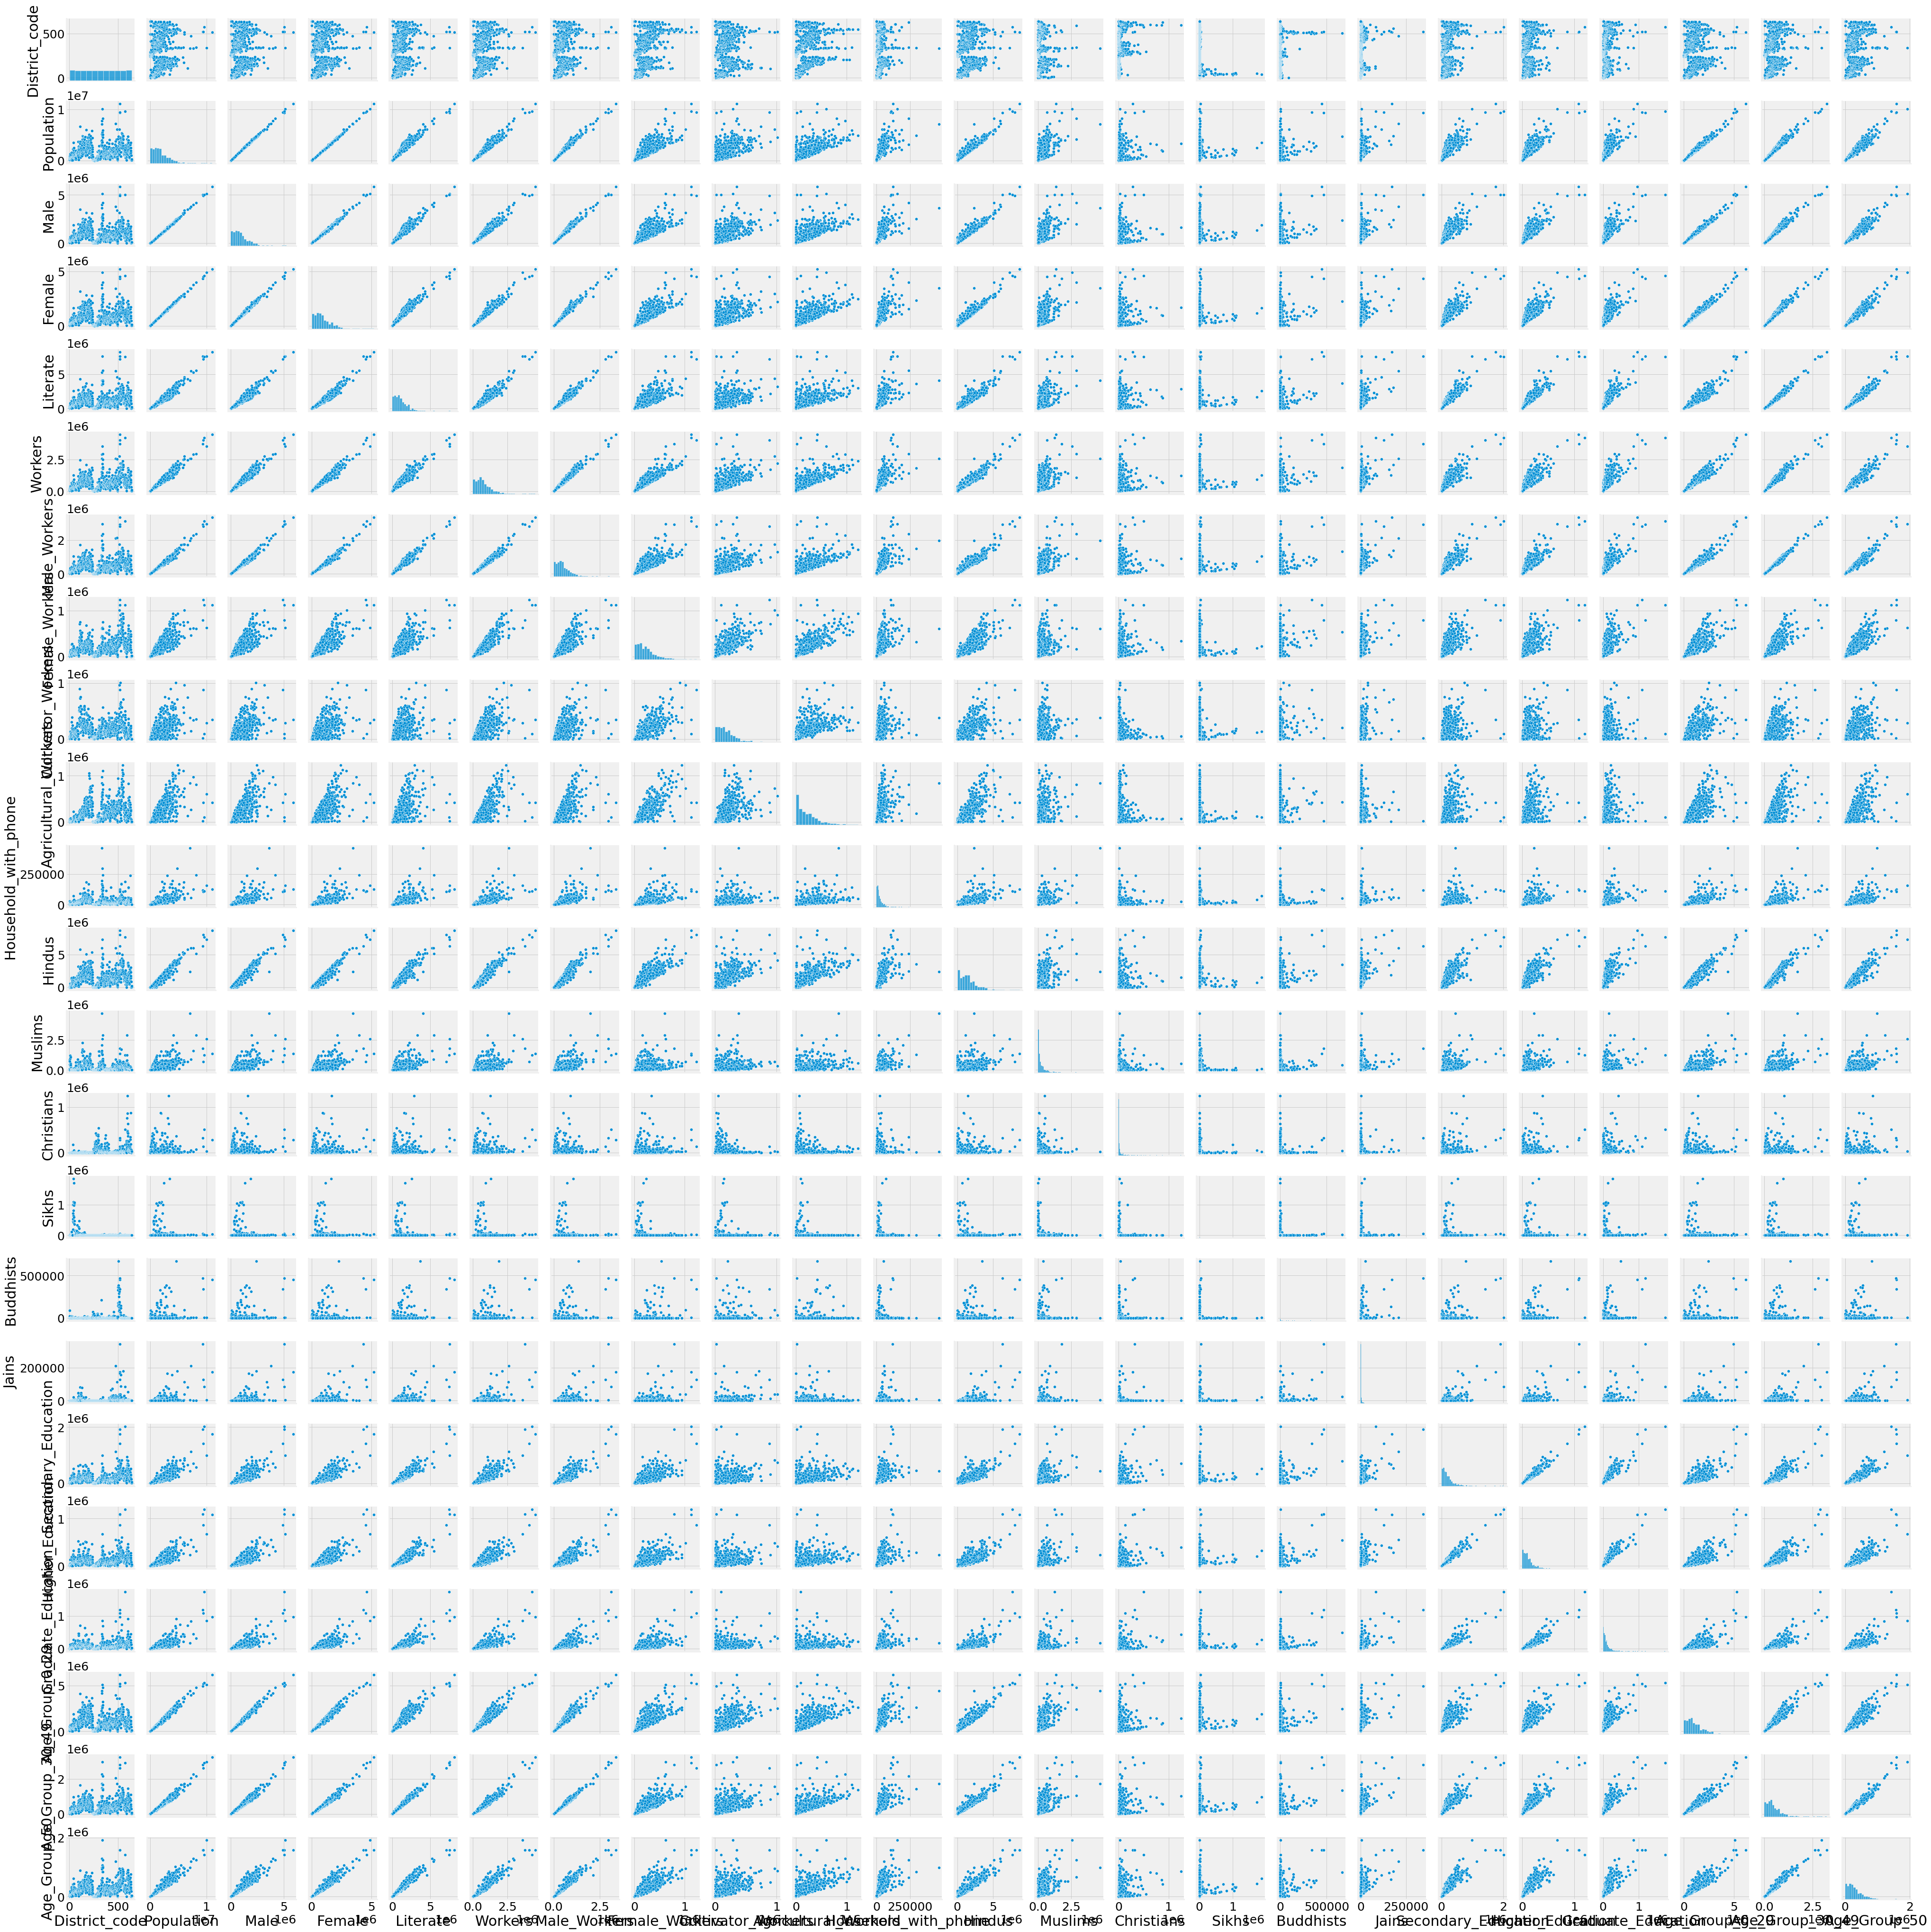

In [283]:
sns.pairplot(data)

Percentage population of india by religion 2011


([<matplotlib.patches.Wedge at 0x2163a15e190>,
 [Text(0.9003242568507431, -0.6319938548167675, 'Hindu'),
  Text(-0.7872736625823674, 0.7682448699497737, 'Muslims'),
  Text(-1.0659615519790893, 0.27152526531122606, 'Christians'),
  Text(-1.0918169877687385, 0.1339241024595583, 'Sikhs'),
  Text(-1.0988660298929538, 0.04993444049249349, 'Buddhists'),
  Text(-1.0999253068002786, 0.01281871523646395, 'Jains')],
 [Text(0.49108595828222346, -0.3447239208091459, '81%'),
  Text(-0.4294219977722004, 0.41904265633624016, '14%'),
  Text(-0.5814335738067758, 0.14810469016975963, '2%'),
  Text(-0.5955365387829482, 0.07304951043248634, '2%'),
  Text(-0.5993814708507019, 0.02723696754136008, '1%'),
  Text(-0.5999592582546973, 0.006992026492616699, '0%')])

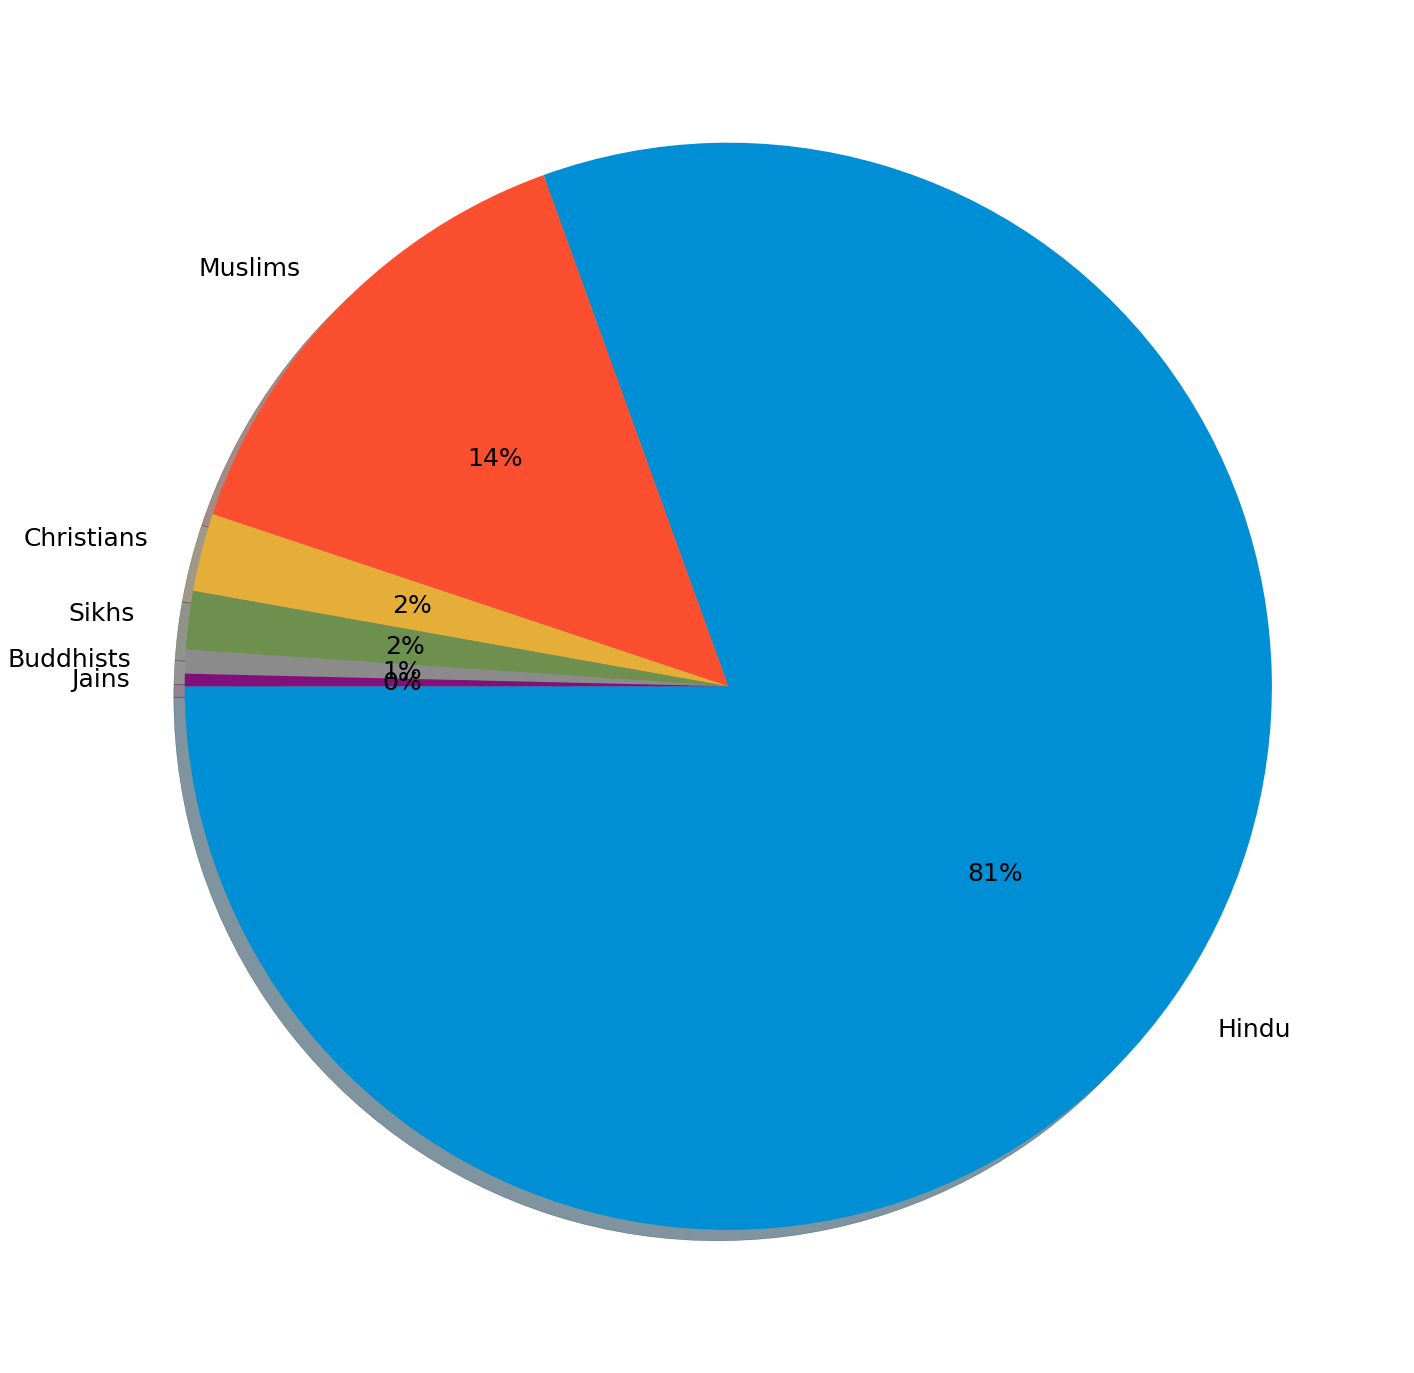

In [284]:
#pie chart of Percentage population of india by religion 2011
t=data['Population'].sum()
def value(x):
    a=(x/t)*100
    return a
    
name=['Hindu', 'Muslims', 'Christians', 'Sikhs','Buddhists','Jains']
h=data['Hindus'].sum()
m=data['Muslims'].sum()
c=data['Christians'].sum()
s=data['Sikhs'].sum()
b=data['Buddhists'].sum()
j=data['Jains'].sum()

people = [value(h),value(m),value(c),value(s),value(b),value(j)]
print("Percentage population of india by religion 2011")
plt.pie(people, labels=name,autopct='%0.f%%', shadow=True,startangle=180)